In [2]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
#Import the data as dataframe
df = pd.read_csv('large_customer_purchases.csv') 

#Display first 10 rows
df.head(10) #

,CustomerID,ProductCategory,PurchaseAmount,PurchaseDate
0,1534,Sports,260.09,2020-01-01 00:00:00
1,2570,Clothing,33.27,2020-01-01 00:00:00
2,2998,Sports,299.04,2020-01-01 00:00:00
3,1329,Sports,320.67,2020-01-01 00:00:00
4,1754,Groceries,244.19,2020-01-01 00:00:00
5,3587,Books,30.02,2020-01-01 00:00:00
6,4493,Sports,209.32,2020-01-01 00:00:00
7,2464,Groceries,107.68,2020-01-01 00:00:00
8,2428,Books,490.26,2020-01-01 00:00:00
9,3666,Books,87.31,2020-01-01 00:00:00


In [4]:
#Display the shape of the dataframe 
df.shape

(1000000, 4)

In [5]:
#Saving all products lists in the data frame
product_category_list = list(df["ProductCategory"].unique())
print(product_category_list)

['Sports', 'Clothing', 'Groceries', 'Books', 'Electronics']


In [6]:
#Computing the total purchsing amount
total_amount = df.PurchaseAmount.sum()

#displaying the amount
display("The total purchasing amount will be : " + str(round(total_amount,2))) 

'The total purchasing amount will be : 252468462.98'

In [7]:
#Finding the index of the most popular product
most_popular_product = df.ProductCategory.value_counts(ascending=False).index[0]
print("Most popular product is : " + str(most_popular_product))

Most popular product is : Groceries


In [8]:
#Create a dictionary of frequencies of all categories
total_counts_by_category = dict(df.ProductCategory.value_counts())

#Create a dictionary of sum of all categories
total_amount_by_category = dict(df.groupby("ProductCategory")["PurchaseAmount"].sum())

#Create a dictionary for averages of all categories
average_amount_by_category = dict()

#Calculate average for each product category
for i in product_category_list:
    average_amount_by_category[i] = round((total_amount_by_category[i]/total_counts_by_category[i]),2)

#Print the averages
print("The averages : \n")
print(average_amount_by_category)

The averages : 

{'Sports': 252.4, 'Clothing': 252.45, 'Groceries': 252.57, 'Books': 252.84, 'Electronics': 252.09}


In [9]:
#Use query to find id of customers who purchased anything over 200
customers_over_two_hundred = df[df['PurchaseAmount'] >= 200.00].groupby('CustomerID')['PurchaseAmount'].apply(list)

#Display the Id of the customers
customers_over_two_hundred

CustomerID
1001    [346.9, 317.4, 305.26, 243.83, 473.69, 205.93,...
1002    [406.27, 330.14, 250.41, 376.28, 210.85, 294.7...
1003    [296.52, 264.31, 465.77, 386.11, 442.56, 269.1...
1004    [329.46, 489.12, 234.66, 275.36, 211.34, 440.8...
1005    [253.49, 267.92, 407.31, 401.5, 488.95, 372.56...
                              ...                        
4995    [289.3, 348.89, 375.3, 218.55, 493.12, 367.22,...
4996    [391.64, 362.78, 419.83, 444.75, 342.75, 424.7...
4997    [285.92, 295.02, 421.78, 461.08, 452.39, 290.5...
4998    [437.92, 327.08, 466.43, 460.05, 447.8, 228.02...
4999    [489.12, 445.61, 227.23, 477.33, 317.54, 374.8...
Name: PurchaseAmount, Length: 3999, dtype: object

In [14]:
purchase_by_customer = df.groupby("CustomerID").agg({'PurchaseAmount':'sum'})
purchase_by_customer

,PurchaseAmount
CustomerID,
1001,59355.02
1002,54409.85
1003,58141.74
1004,64109.97
1005,68231.19
...,...
4995,61425.96
4996,69904.92
4997,60099.23


In [ ]:
total_purchase_by_customer = purchase_by_customer["PurchaseAmount"].sum()
noof_purchase_by_customer = purchase_by_customer["PurchaseAmount"].count()
average_purchase_by_customer = round(total_purchase_by_customer/noof_purchase_by_customer,2)
average_purchase_by_customer

63132.9

In [22]:
high_spending_customers = purchase_by_customer.loc[(
    purchase_by_customer["PurchaseAmount"] >= average_purchase_by_customer
    )]
high_spending_customers

,PurchaseAmount
CustomerID,
1004,64109.97
1005,68231.19
1007,64661.65
1009,68697.93
1010,63385.96
...,...
4990,65637.58
4991,66978.75
4994,68734.38


In [23]:
low_spending_customers = purchase_by_customer.loc[(
    purchase_by_customer["PurchaseAmount"] < average_purchase_by_customer
    )]
low_spending_customers

,PurchaseAmount
CustomerID,
1001,59355.02
1002,54409.85
1003,58141.74
1006,57418.18
1008,49382.30
...,...
4992,61851.00
4993,60645.75
4995,61425.96


In [ ]:
#Create a new column Purchase year and extract yearly value from the 'PurchaseDate' column
df['PurchaseYear'] = pd.DatetimeIndex(df['PurchaseDate']).year

#display the newly added column
df['PurchaseYear']

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
999995    2020
999996    2020
999997    2020
999998    2020
999999    2020
Name: PurchaseYear, Length: 1000000, dtype: int32

In [ ]:
#display the new shape
df.shape

(1000000, 5)

In [ ]:
#Create a new column for purchasing month for the transaction 
df['PurchaseMonth'] = pd.to_datetime(df['PurchaseDate']).dt.month

#display the newly created column
df["PurchaseMonth"]

0         1
1         1
2         1
3         1
4         1
         ..
999995    2
999996    2
999997    2
999998    2
999999    2
Name: PurchaseMonth, Length: 1000000, dtype: int32

In [ ]:
#confirm the new shape of the dataframe 
df.shape

(1000000, 6)

In [ ]:
#Create a dictionary to store all value counts for each product category
product_category_dataframe = dict(df.ProductCategory.value_counts())

#diaply the dictionary
product_category_dataframe

{'Groceries': 200531,
 'Electronics': 200321,
 'Clothing': 200102,
 'Books': 199812,
 'Sports': 199234}

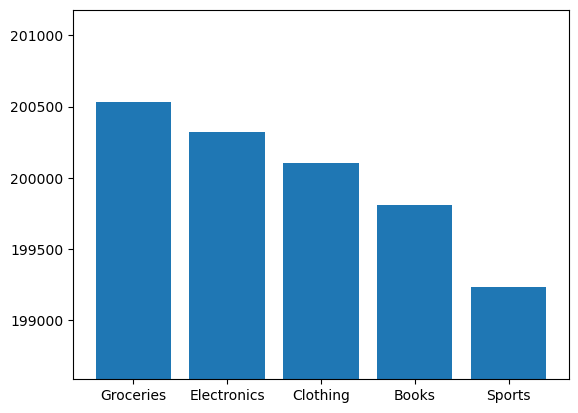

In [ ]:
x = list(product_category_dataframe.keys()) #Retain all names of product categories 
y = list(product_category_dataframe.values()) #Retain all the values for the sales 
low = min(y)   #Find the lowest number in the sales 
high = max(y)   #Find the highest number in the sales 

#Set the limit of the y-axis to the nearset integer (smaller than lower and higher than the highest)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

#Plot the bar graph 
plt.bar(x,y) 
plt.show()